# **Exploratory Data Analysis**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../ml_data/all_pib_ML.csv')

In [35]:
df.head(10)

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Código UF,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,adjusted_population,adjusted_funding,Pib per capita
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,...,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,13912.05,5.327668e+06,18368.70
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,...,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,78834.95,3.019012e+07,18368.70
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,...,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,919.80,2.282065e+05,16240.46
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,...,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,5212.20,1.293170e+06,16240.46
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,...,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,2713.95,4.222213e+05,12273.84
5,2012,1100064,Urbana,86.9,5.6,7.5,733,54,3,32,...,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,15379.05,2.392587e+06,12273.84
6,2012,1100072,Rural,91.4,5.3,3.3,155,12,2,6,...,11.0,RO,CORUMBIARA,4.71,21.0,6.35,31.61,1279.50,3.427010e+05,20618.11
7,2012,1100072,Urbana,83.3,4.4,12.3,237,19,1,13,...,11.0,RO,CORUMBIARA,4.71,21.0,6.35,31.61,7250.50,1.941973e+06,20618.11
8,2012,1100080,Rural,60.3,18.1,21.6,192,10,1,8,...,11.0,RO,COSTA MARQUES,4.23,21.0,6.35,31.61,2153.25,7.888205e+05,9341.05
9,2012,1100080,Urbana,78.0,4.9,17.1,380,28,1,14,...,11.0,RO,COSTA MARQUES,4.23,21.0,6.35,31.61,12201.75,4.469983e+06,9341.05


In [36]:
df.shape

(62041, 21)

In [7]:
# Remove linhas duplicadas do DataFrame 'df'
df_sem_duplicatas = df.drop_duplicates()

In [8]:
df_sem_duplicatas.shape

(62041, 21)

In [9]:
df.nunique()

Ano                        9
Código_IBGE             5280
Localização                2
Aprovação                601
Reprovação               496
Abandono                 447
Matrículas              8124
Docentes                1167
Estabelecimentos         139
Turmas                  1143
Regiao                     5
Código UF                 27
UF                        27
Municipio               5281
Magreza %               1204
Acesso a internet %       33
Unemployed               192
Poverty_Rate             233
adjusted_population    37586
adjusted_funding       58896
Pib per capita         47051
dtype: int64

In [10]:
df.dtypes

Ano                      int64
Código_IBGE              int64
Localização             object
Aprovação              float64
Reprovação             float64
Abandono               float64
Matrículas              object
Docentes                object
Estabelecimentos         int64
Turmas                  object
Regiao                  object
Código UF              float64
UF                      object
Municipio               object
Magreza %              float64
Acesso a internet %    float64
Unemployed             float64
Poverty_Rate           float64
adjusted_population    float64
adjusted_funding       float64
Pib per capita         float64
dtype: object

### **Análises Bivariadas**

Coeficiente de Correlação: -0.38

Estatísticas PIB per capita:
count     62041.000000
mean      20386.016048
std       20698.491105
min       -1459.830000
25%        8690.330000
50%       14663.850000
75%       25166.750000
max      591101.110000
Name: Pib per capita, dtype: float64

Estatísticas Taxa de Pobreza:
count    62041.000000
mean        27.289274
std         14.553810
min          7.980000
25%         14.320000
50%         20.800000
75%         42.550000
max         55.920000
Name: Poverty_Rate, dtype: float64


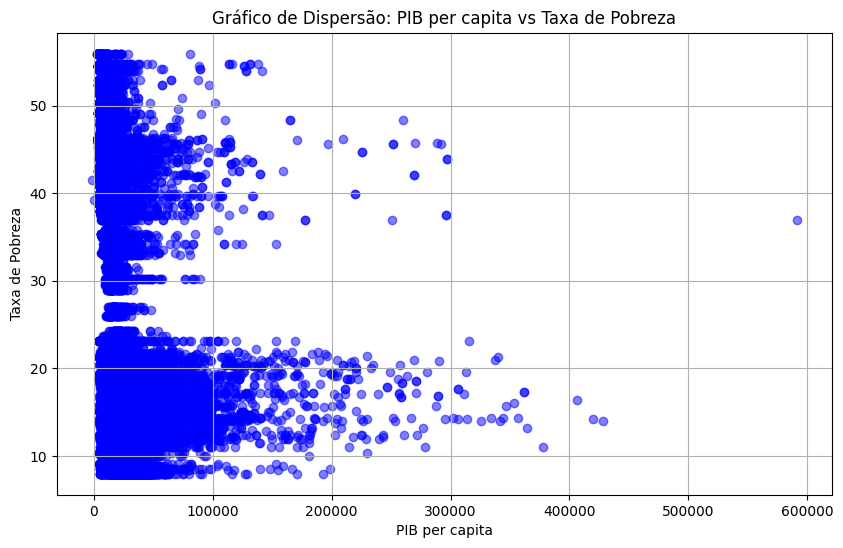

In [53]:
# Gráfico de dispersão PIB per capita vs Taxa de Pobreza
plt.figure(figsize=(10, 6))
plt.scatter(df['Pib per capita'], df['Poverty_Rate'], alpha=0.5, color='blue')
plt.title('Gráfico de Dispersão: PIB per capita vs Taxa de Pobreza')
plt.xlabel('PIB per capita')
plt.ylabel('Taxa de Pobreza')
plt.grid(True)

# Calcule o coeficiente de correlação (coeficiente de Pearson)
correlation = df['Pib per capita'].corr(df['Poverty_Rate'])
print(f"Coeficiente de Correlação: {correlation:.2f}")

# Estatísticas resumidas
estatisticas_pib = df['Pib per capita'].describe()
estatisticas_pobreza = df['Poverty_Rate'].describe()

print("\nEstatísticas PIB per capita:")
print(estatisticas_pib)

print("\nEstatísticas Taxa de Pobreza:")
print(estatisticas_pobreza)

plt.show()

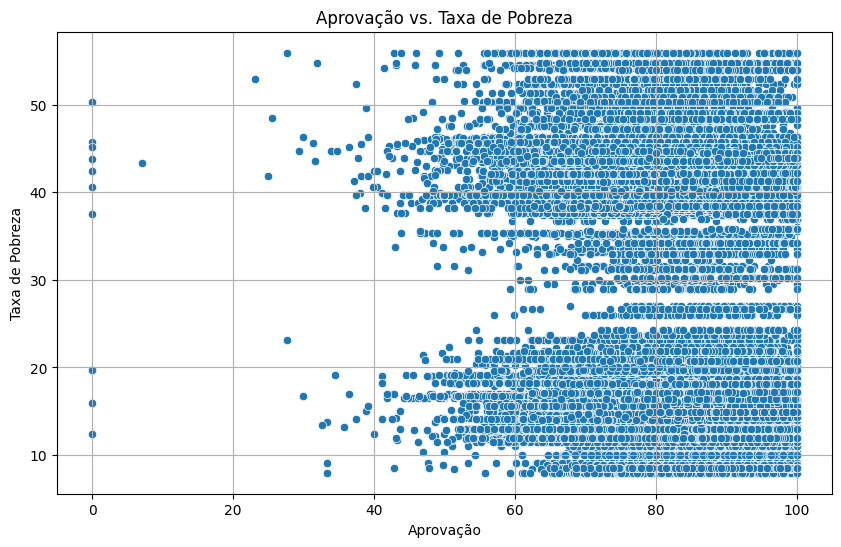

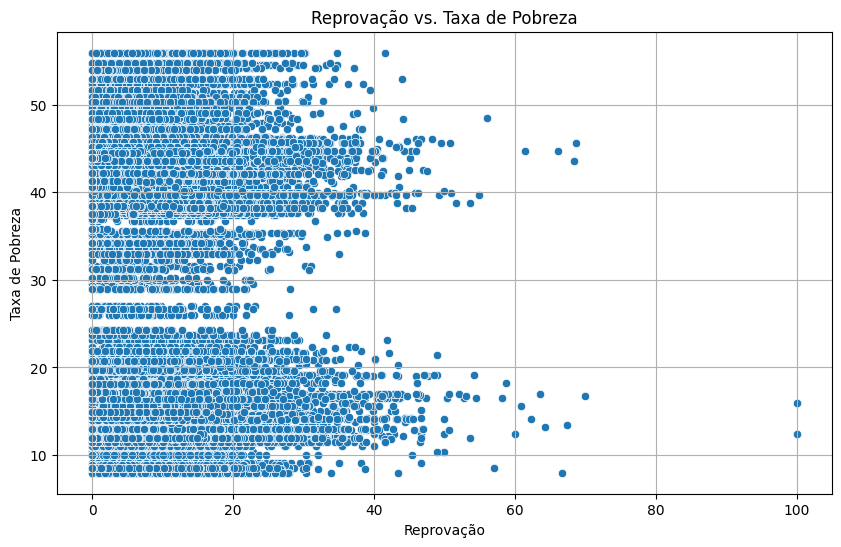

In [9]:
# TAXA DE POBREZA COM RELACÃO A APROVAÇÃO

# Gráfico de dispersão Aprovação vs. Taxa de Pobreza
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Aprovação', y='Poverty_Rate')
plt.title('Aprovação vs. Taxa de Pobreza')
plt.xlabel('Aprovação')
plt.ylabel('Taxa de Pobreza')
plt.grid(True)
plt.show()

# TAXA DE POBREZA COM RELACÃO A DESAPROVAÇÃO

# Gráfico de dispersão Reprovação vs. Taxa de Pobreza
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reprovação', y='Poverty_Rate')
plt.title('Reprovação vs. Taxa de Pobreza')
plt.xlabel('Reprovação')
plt.ylabel('Taxa de Pobreza')
plt.grid(True)
plt.show()

In [94]:
# Critérios para classificar as classes de pobreza:
limite_A = 20
limite_B = 50

# Classifique os dados em classes com base na taxa de pobreza:
df['Classe_Social'] = 'C'  # Classe Padrão: Classe C (Mais Pobres)
df.loc[df['Poverty_Rate'] < limite_A, 'Classe_Social'] = 'A'  # Classe A (Mais Ricos)
df.loc[(df['Poverty_Rate'] >= limite_A) & (df['Poverty_Rate'] < limite_B), 'Classe_Social'] = 'B'  # Classe B (Classe Média)

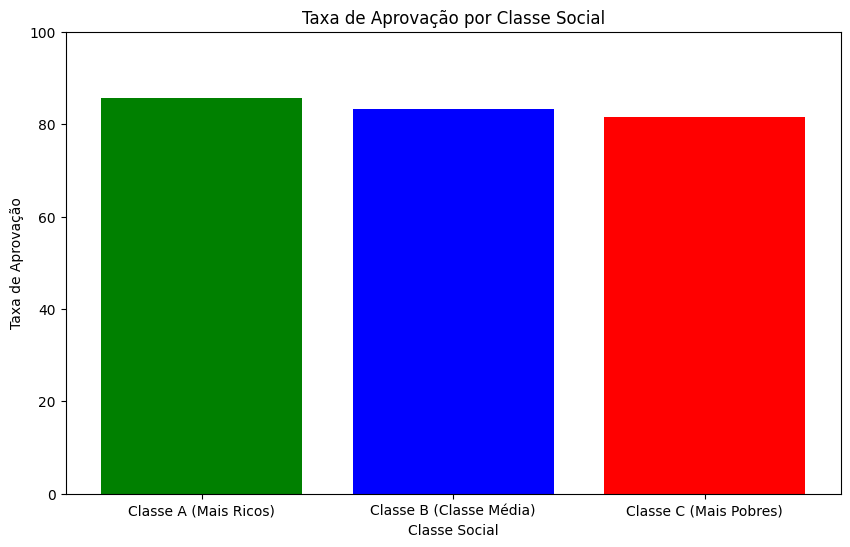

In [76]:
# médias das taxas de aprovação para cada classe
classe_A_aprovacao = df[df['Classe_Social'] == 'A']['Aprovação'].mean()
classe_B_aprovacao = df[df['Classe_Social'] == 'B']['Aprovação'].mean()
classe_C_aprovacao = df[df['Classe_Social'] == 'C']['Aprovação'].mean()

# Classes 
classes = ['Classe A (Mais Ricos)', 'Classe B (Classe Média)', 'Classe C (Mais Pobres)']
taxas_aprovacao = [classe_A_aprovacao, classe_B_aprovacao, classe_C_aprovacao]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(classes, taxas_aprovacao, color=['green', 'blue', 'red'])
plt.title('Taxa de Aprovação por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Taxa de Aprovação')
plt.ylim(0, 100)  # Defina o limite do eixo y de 0 a 100%
plt.show()

In [95]:
# Calcule as estatísticas de abandono para cada classe
estatisticas_abandono = df.groupby('Classe_Social')['Abandono'].mean()

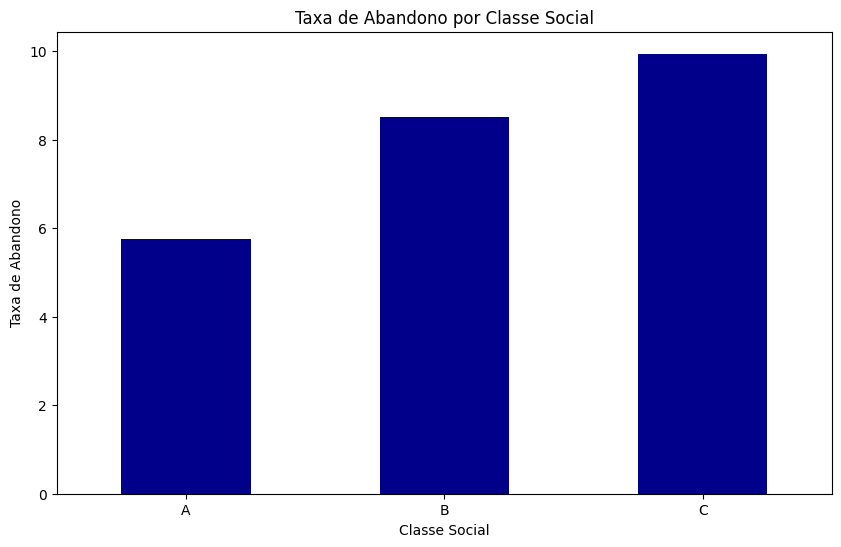

In [68]:
# Crie um gráfico de barras para comparar as estatísticas de abandono por classe de pobreza
estatisticas_abandono.plot(kind='bar', figsize=(10, 6), color='darkblue')
plt.title('Taxa de Abandono por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Taxa de Abandono')
plt.xticks(rotation=0)  
plt.show()

In [96]:
# Agrupe os dados por região e calcule as estatísticas de abandono e desemprego
estatisticas_regiao = df.groupby('Regiao')[['Abandono', 'Unemployed']].mean()

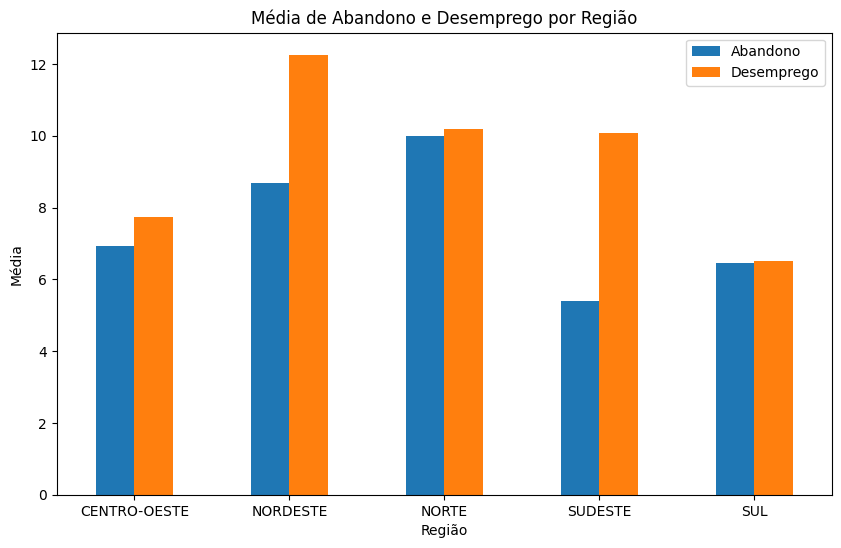

In [97]:
# Crie um gráfico de barras para comparar a média de abandono e desemprego por região
estatisticas_regiao.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Abandono e Desemprego por Região')
plt.xlabel('Região')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(["Abandono", "Desemprego"])
plt.show()

In [98]:
df.describe()

,Ano,Código_IBGE,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,Código UF,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,adjusted_population,adjusted_funding,Pib per capita,Alunos_Aprovados_por_Turma,Alunos_Reprovados_por_Turma,Abandono_por_Turma
count,62041.000000,6.204100e+04,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,62041.000000,6.204100e+04,6.204100e+04,62041.000000,62041.000000,6.204100e+04,62041.0
mean,2016.023210,3.165181e+06,84.259113,8.480698,7.260189,345.877641,49.616632,2.898003,28.457533,32.084605,3.758916,55.997840,9.841791,27.289274,2.664990e+04,1.061817e+07,20386.016048,281.709150,6.416849e+01,0.0
std,2.578486,1.018667e+06,10.436065,7.315942,6.690313,1369.660239,90.245993,10.868293,96.275263,10.167784,2.891133,16.120853,3.528323,14.553810,1.609054e+05,4.987461e+07,20698.491105,980.541923,4.077935e+02,0.0
min,2012.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,21.000000,2.875000,7.980000,2.026500e+02,0.000000e+00,-1459.830000,0.000000,-2.220446e-16,0.0
25%,2014.000000,2.406601e+06,77.700000,2.900000,2.100000,82.000000,14.000000,1.000000,6.000000,25.000000,2.390000,46.000000,7.225000,14.320000,3.719600e+03,1.603766e+06,8690.330000,70.984000,3.927000e+00,0.0
50%,2016.000000,3.131406e+06,85.200000,7.000000,5.900000,209.000000,23.000000,1.000000,12.000000,31.000000,3.570000,56.000000,9.300000,20.800000,8.125150e+03,3.718146e+06,14663.850000,175.791000,2.406400e+01,0.0
75%,2018.000000,4.109757e+06,92.200000,12.300000,10.600000,424.000000,45.000000,2.000000,24.000000,41.000000,4.820000,69.000000,12.350000,42.550000,1.850790e+04,9.350268e+06,25166.750000,349.830000,6.749000e+01,0.0
max,2020.000000,5.300108e+06,100.000000,100.000000,100.000000,176350.000000,999.000000,694.000000,11173.000000,53.000000,100.000000,86.000000,20.175000,55.920000,1.047645e+07,3.970060e+09,591101.110000,118859.900000,5.749010e+04,0.0


In [37]:
df['Docentes'] = df['Docentes'].str.replace(',', '.', regex=True).replace(' -   ', '0', regex=True)
#Converta para float
df['Docentes'] = df['Docentes'].astype(float)

#Matriculas
df['Matrículas'] = df['Matrículas'].str.replace(',', '.', regex=True).replace(' -   ', '0', regex=True)
df['Matrículas'] = df['Matrículas'].astype(float)

#Turmas
df['Turmas'] = df['Turmas'].str.replace(',', '.', regex=True).replace(' -   ', '0', regex=True)
df['Turmas'] = df['Turmas'].astype(float)

### **Feature Egineering**

In [38]:
# Calcular alunos aprovados por turma!
df['Alunos_Aprovados'] = (df['Matrículas'] * df['Aprovação']) / 100
df['Alunos_Aprovados_por_Turma'] = df['Alunos_Aprovados'] / df['Turmas']

# Reprovação
df['Alunos_Reprovados'] = df['Matrículas'] * df['Reprovação'] / 100
df['Alunos_Reprovados_por_Turma'] = df['Alunos_Reprovados'] / df['Turmas']

df['Abandonos_por_Matrícula'] = df['Matrículas'] * df['Abandono'] / 100
df['Abandonos_por_Turma'] = df['Abandonos_por_Matrícula'] / df['Turmas']

In [44]:
# Nova feature - Alunos indo para escola %
df['% students going to school'] = (df['Matrículas'] / df['adjusted_population']) * 100

In [47]:
# Número de Docentes por Turma
df['Docentes_por_Turma'] = df['Docentes'] / df['Turmas']

In [48]:
df.columns

Index(['Ano', 'Código_IBGE', 'Localização', 'Aprovação', 'Reprovação',
       'Abandono', 'Matrículas', 'Docentes', 'Estabelecimentos', 'Turmas',
       'Regiao', 'Código UF', 'UF', 'Municipio', 'Magreza %',
       'Acesso a internet %', 'Unemployed', 'Poverty_Rate',
       'adjusted_population', 'adjusted_funding', 'Pib per capita',
       'Alunos_Aprovados', 'Alunos_Aprovados_por_Turma', 'Alunos_Reprovados',
       'Alunos_Reprovados_por_Turma', 'Abandonos_por_Matrícula',
       'Abandonos_por_Turma', '% students going to school',
       'Docentes_por_Turma'],
      dtype='object')

In [67]:
df.head()

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,adjusted_funding,Pib per capita,Alunos_Aprovados,Alunos_Aprovados_por_Turma,Alunos_Reprovados,Alunos_Reprovados_por_Turma,Abandonos_por_Matrícula,Abandonos_por_Turma,% students going to school,Docentes_por_Turma
0,2012,1100023,Rural,92.6,4.0,3.4,498.0,42.0,1,15.0,...,5.327668e+06,18368.70,461.148,30.743200,19.920,1.328000,16.932,1.128800,3.579631,2.800000
1,2012,1100023,Urbana,69.9,16.6,13.5,3453.0,172.0,6,136.0,...,3.019012e+07,18368.70,2413.647,17.747404,573.198,4.214691,466.155,3.427610,4.380037,1.264706
2,2012,1100031,Rural,92.1,2.6,5.3,38.0,6.0,1,3.0,...,2.282065e+05,16240.46,34.998,11.666000,0.988,0.329333,2.014,0.671333,4.131333,2.000000
3,2012,1100031,Urbana,91.3,5.2,3.5,230.0,22.0,1,11.0,...,1.293170e+06,16240.46,209.990,19.090000,11.960,1.087273,8.050,0.731818,4.412724,2.000000
4,2012,1100064,Rural,90.6,9.2,0.2,415.0,42.0,1,15.0,...,4.222213e+05,12273.84,375.990,25.066000,38.180,2.545333,0.830,0.055333,15.291365,2.800000


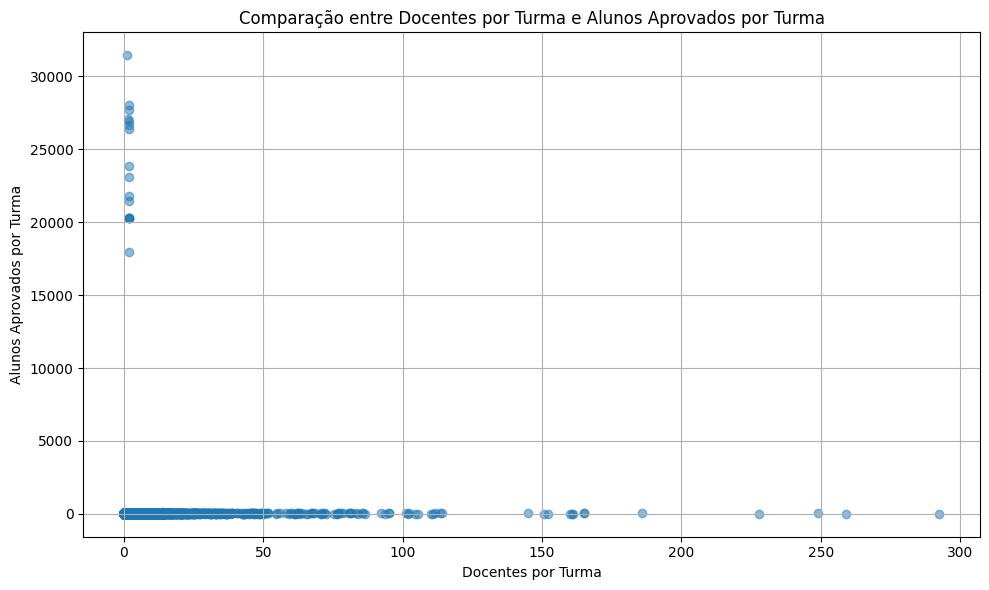

In [52]:
# Crie um gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['Docentes_por_Turma'], df['Alunos_Aprovados_por_Turma'], alpha=0.5)
plt.xlabel('Docentes por Turma')
plt.ylabel('Alunos Aprovados por Turma')
plt.title('Comparação entre Docentes por Turma e Alunos Aprovados por Turma')
plt.grid(True)
plt.tight_layout()
plt.show()

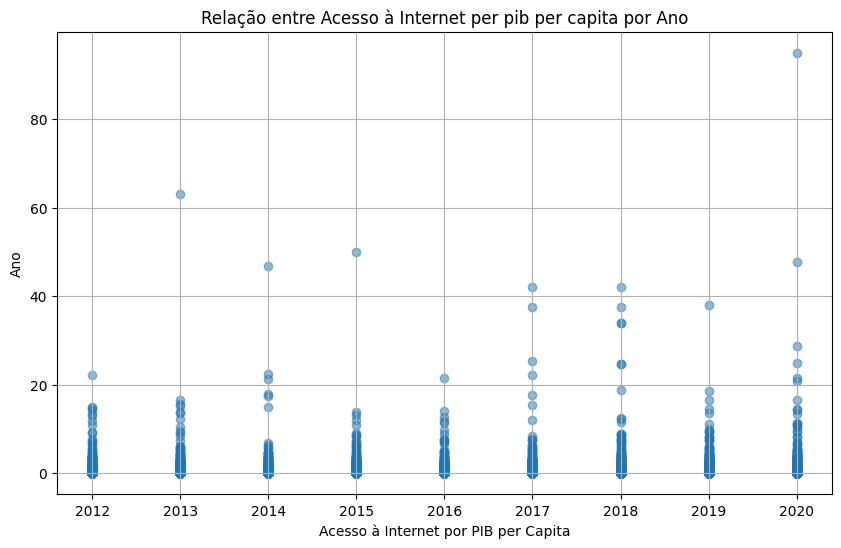

In [158]:
# Pib per capita em relacao ao Acesso a internet por pib per capita

# Selecionar os primeiros 100 dados:
dados_aleatorios = df.sample(n=10000, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(dados_aleatorios['Ano'], dados_aleatorios['Acesso á internet por Pib per capita'], alpha=0.5)
plt.xlabel('Acesso à Internet por PIB per Capita')
plt.ylabel('Ano')
plt.title('Relação entre Acesso à Internet per pib per capita por Ano')
plt.grid(True)
plt.show()

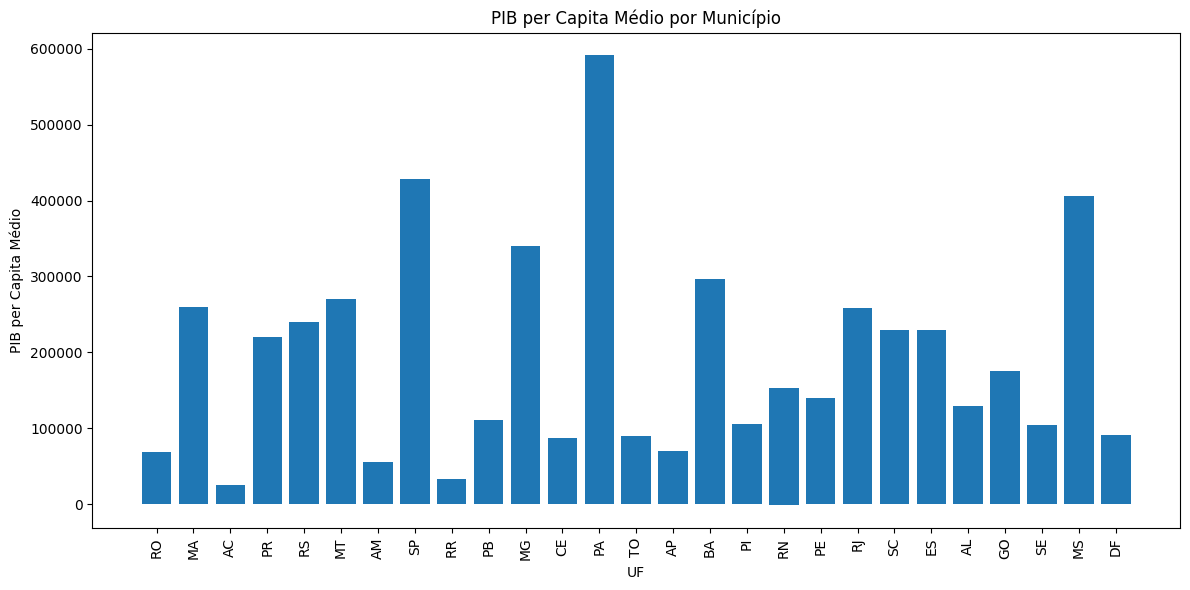

In [131]:
# Calcular a média do PIB per capita
pib_per_capita_medio = df['Pib per capita'].mean()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df['UF'], df['Pib per capita'])
plt.xlabel('UF')
plt.ylabel('PIB per Capita Médio')
plt.title('PIB per Capita Médio por Município')
plt.xticks(rotation=90)  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Garantir que os rótulos não se sobreponham
plt.show()

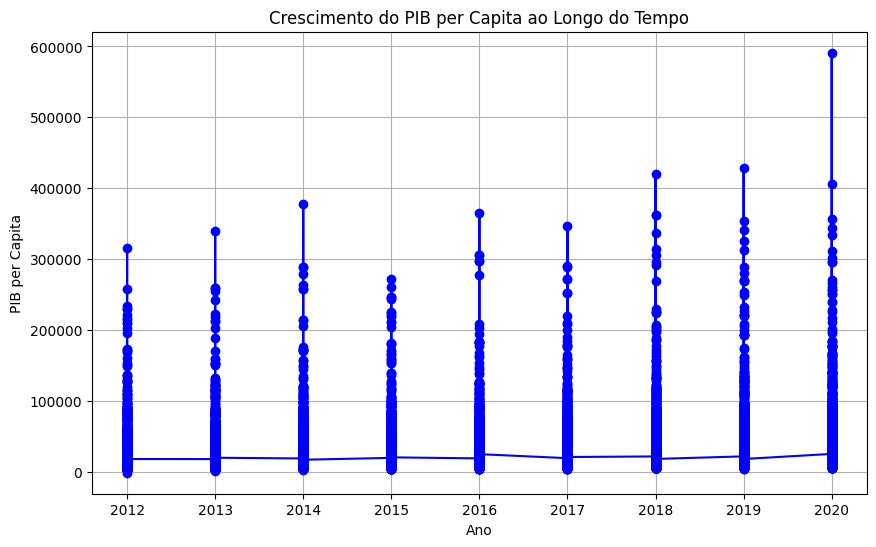

In [141]:
# Criar um gráfico de linha com uma única linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(df['Ano'], df['Pib per capita'], marker='o', linestyle='-', color='b')

# Configurar os rótulos dos eixos e título
plt.xlabel('Ano')
plt.ylabel('PIB per Capita')
plt.title('Crescimento do PIB per Capita ao Longo do Tempo')

# Exibir o gráfico
plt.grid(True)
plt.show()

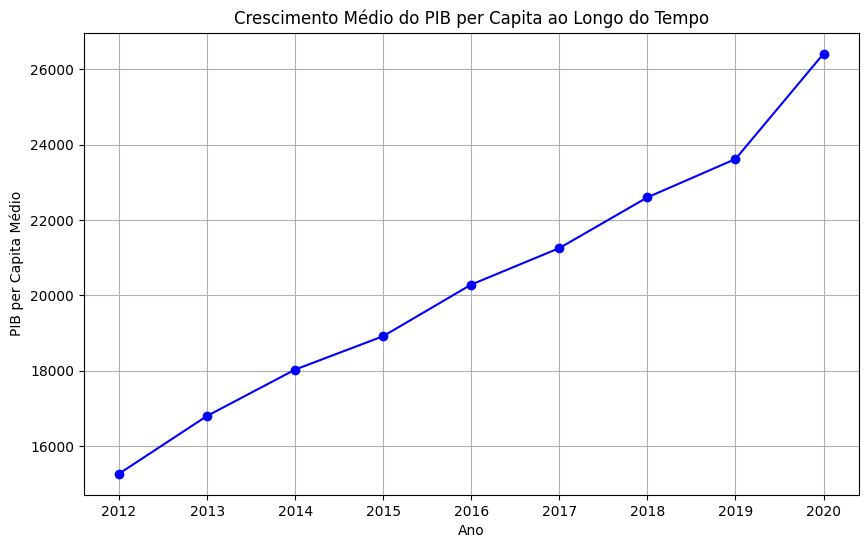

In [142]:
# Calcular o PIB per capita médio por ano:
pib_per_capita_medio_por_ano = df.groupby('Ano')['Pib per capita'].mean().reset_index()

# Gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(pib_per_capita_medio_por_ano['Ano'], pib_per_capita_medio_por_ano['Pib per capita'], marker='o', linestyle='-', color='b')

# Configurar os rótulos dos eixos e título
plt.xlabel('Ano')
plt.ylabel('PIB per Capita Médio')
plt.title('Crescimento Médio do PIB per Capita ao Longo do Tempo')

# Exibir o gráfico
plt.grid(True)  # Adicionar uma grade de fundo
plt.show()

### **Heatmap**

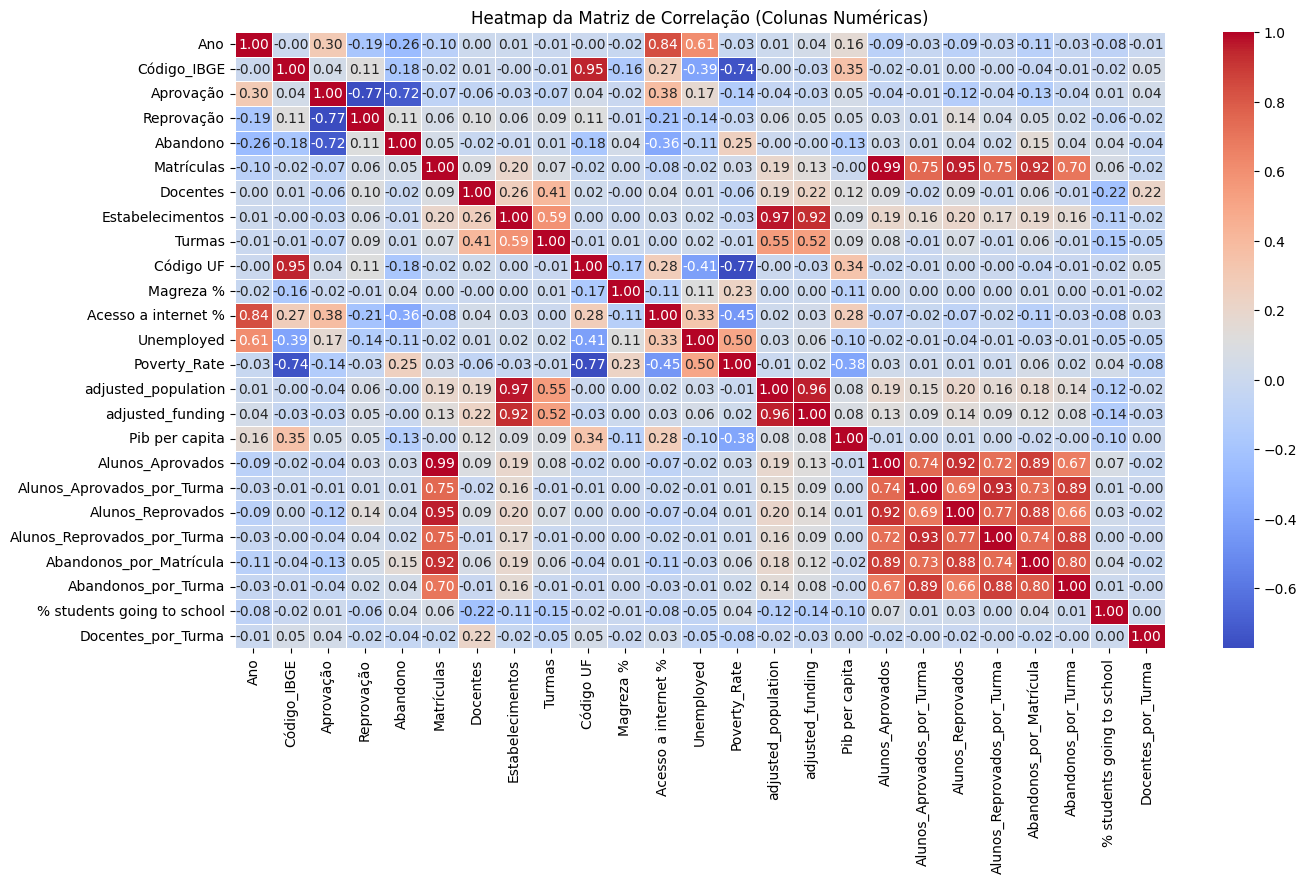

In [69]:
# Selecionar apenas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = colunas_numericas.corr()

# Criar o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação (Colunas Numéricas)')
plt.show()

### **Análises Multivariadas**

<Figure size 1200x600 with 0 Axes>

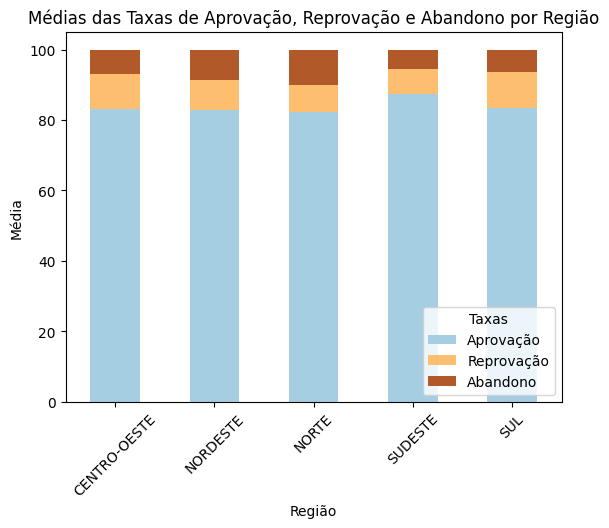

In [44]:
# Calcule as médias das taxas de Aprovação, Reprovação e Abandono por região
medias_por_regiao = df.groupby('Regiao')[['Aprovação', 'Reprovação', 'Abandono']].mean()

# Crie um gráfico de barras empilhadas para comparar as médias das taxas de educação entre as regiões
plt.figure(figsize=(12, 6))
medias_por_regiao.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Médias das Taxas de Aprovação, Reprovação e Abandono por Região')
plt.xlabel('Região')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.legend(loc='lower right', title='Taxas')
plt.show()

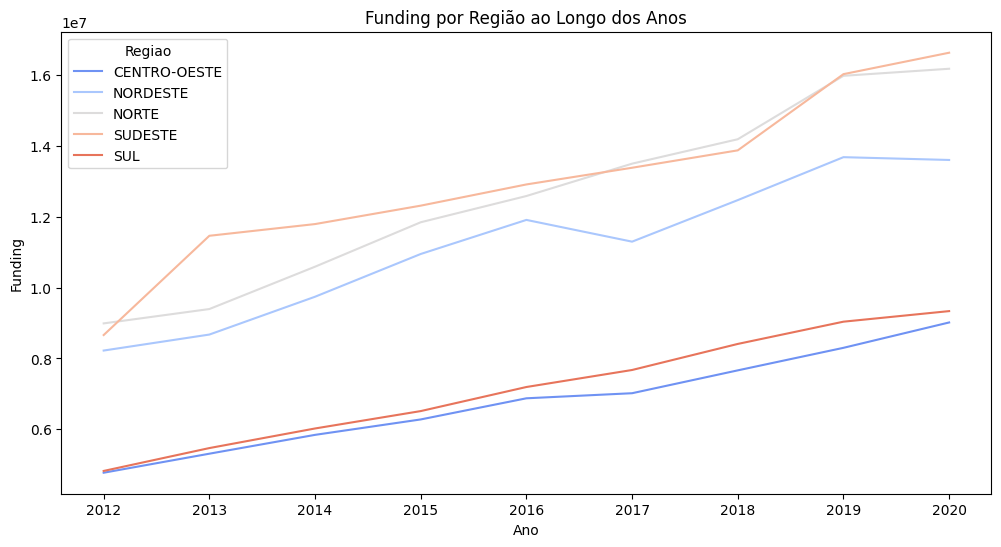

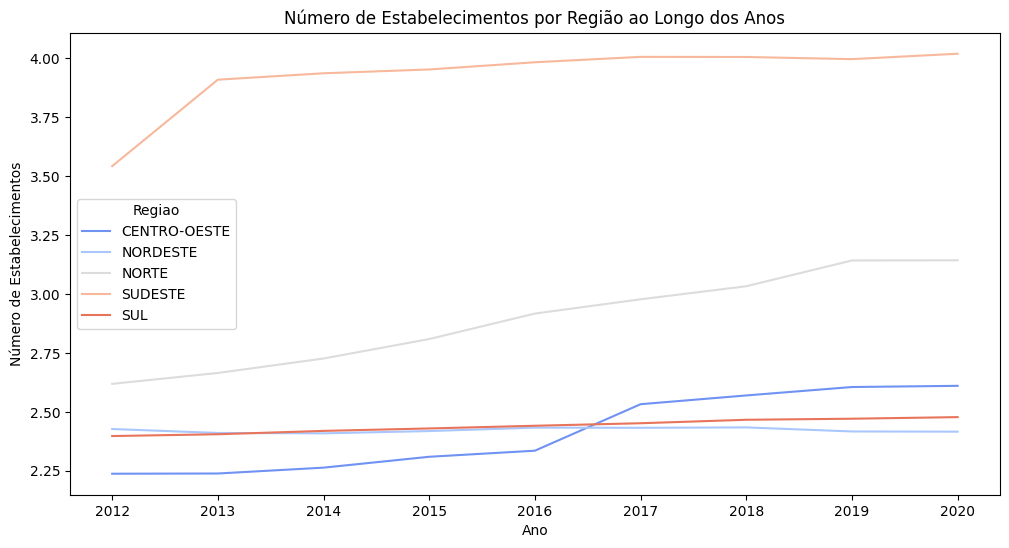

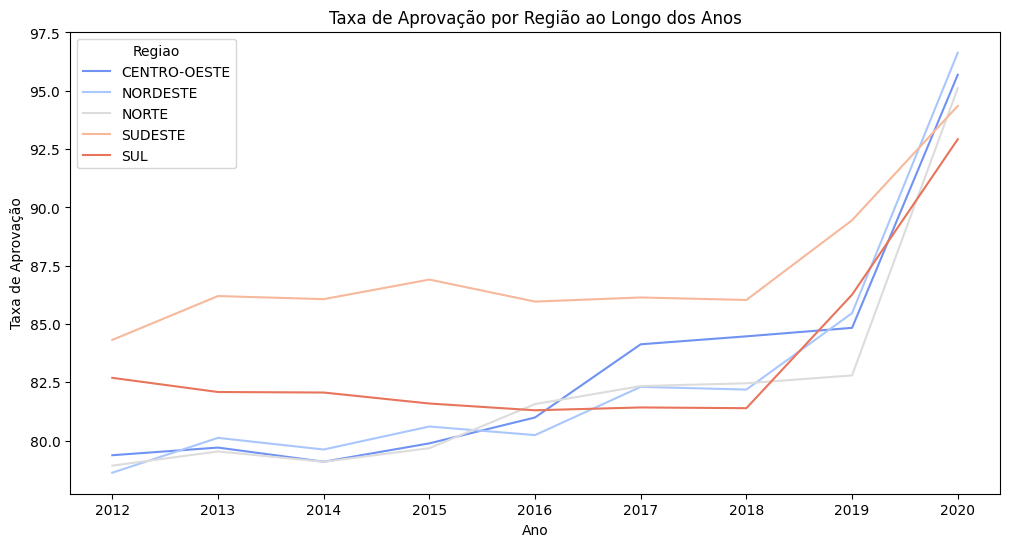

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja seu DataFrame com os dados

# Agrupe os dados por 'Ano' e 'Regiao' e calcule as médias
dados_agrupados = df.groupby(['Ano', 'Regiao']).agg({
    'adjusted_funding': 'mean',
    'Estabelecimentos': 'mean',
    'Aprovação': 'mean'
}).reset_index()

# Crie um gráfico de linhas para funding por região ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ano', y='adjusted_funding', hue='Regiao', data=dados_agrupados, palette='coolwarm')
plt.title('Funding por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Funding')
plt.legend(title='Regiao', loc='upper left')

# Crie um gráfico de linhas para o número de estabelecimentos por região ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ano', y='Estabelecimentos', hue='Regiao', data=dados_agrupados, palette='coolwarm')
plt.title('Número de Estabelecimentos por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Estabelecimentos')
plt.legend(title='Regiao', loc='center left')

# Crie um gráfico de linhas para a taxa de aprovação por região ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ano', y='Aprovação', hue='Regiao', data=dados_agrupados, palette='coolwarm')
plt.title('Taxa de Aprovação por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Taxa de Aprovação')
plt.legend(title='Regiao', loc='upper left')

plt.show()

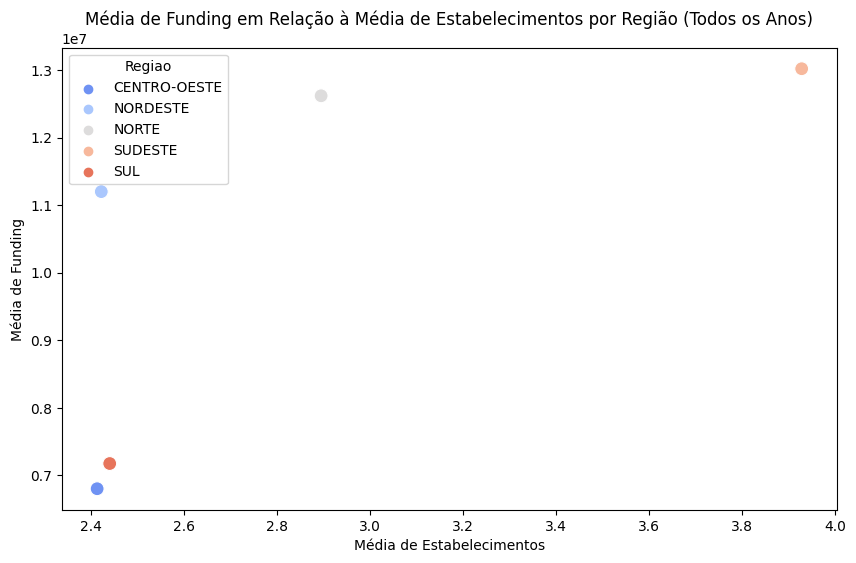

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja seu DataFrame com os dados

# Agrupe os dados por 'Regiao' e calcule as médias para 'adjusted_funding' e 'Estabelecimentos'
dados_regiao_media = df.groupby('Regiao').agg({
    'adjusted_funding': 'mean',
    'Estabelecimentos': 'mean'
}).reset_index()

# Crie um gráfico de dispersão para a média de funding em relação à média de estabelecimentos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estabelecimentos', y='adjusted_funding', hue='Regiao', data=dados_regiao_media, palette='coolwarm', s=100)
plt.title('Média de Funding em Relação à Média de Estabelecimentos por Região (Todos os Anos)')
plt.xlabel('Média de Estabelecimentos')
plt.ylabel('Média de Funding')
plt.legend(title='Regiao', loc='upper left')

plt.show()

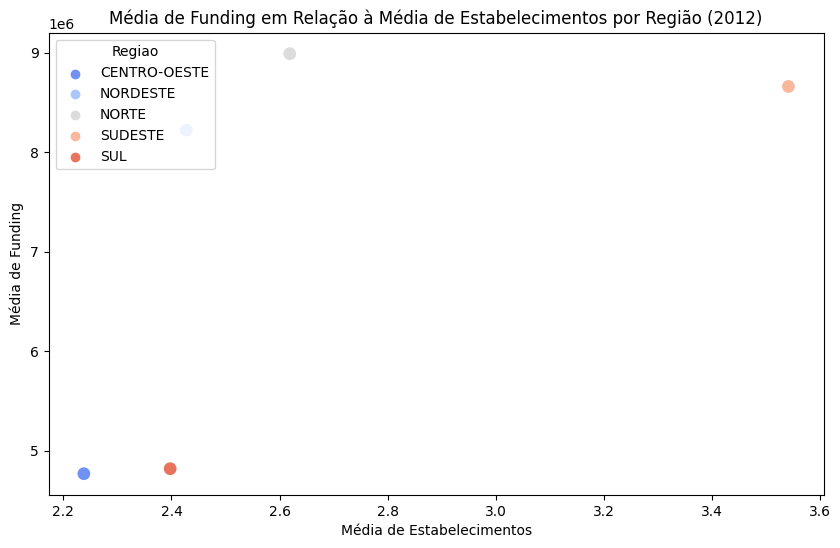

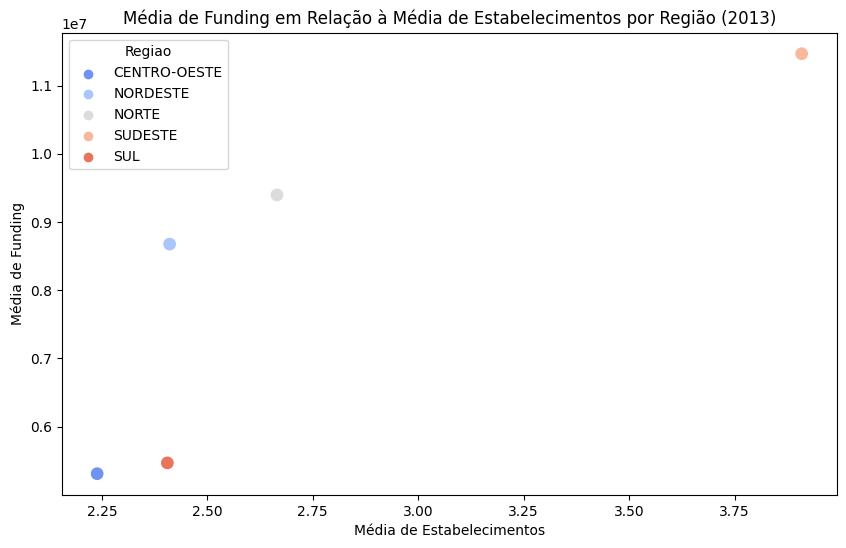

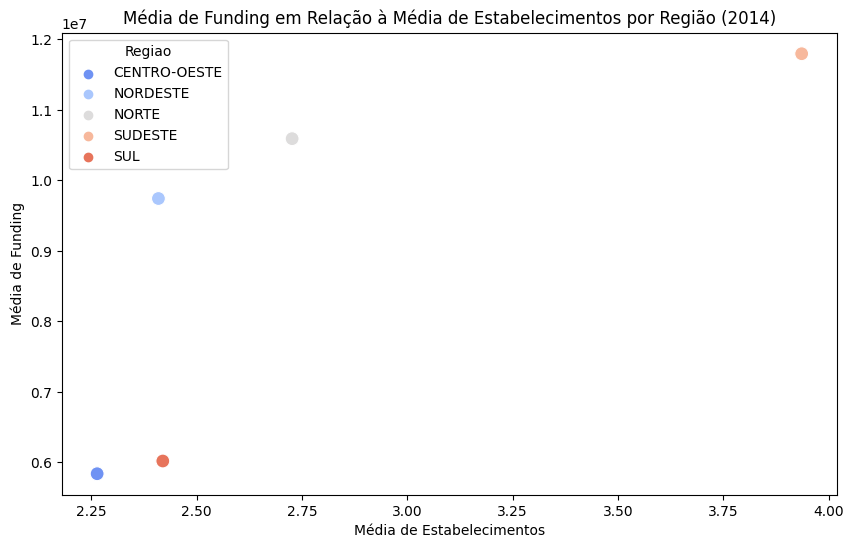

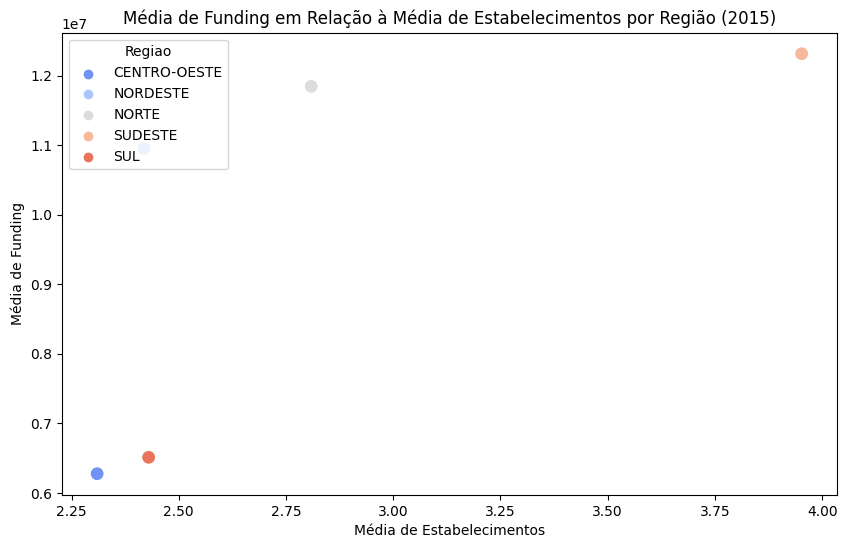

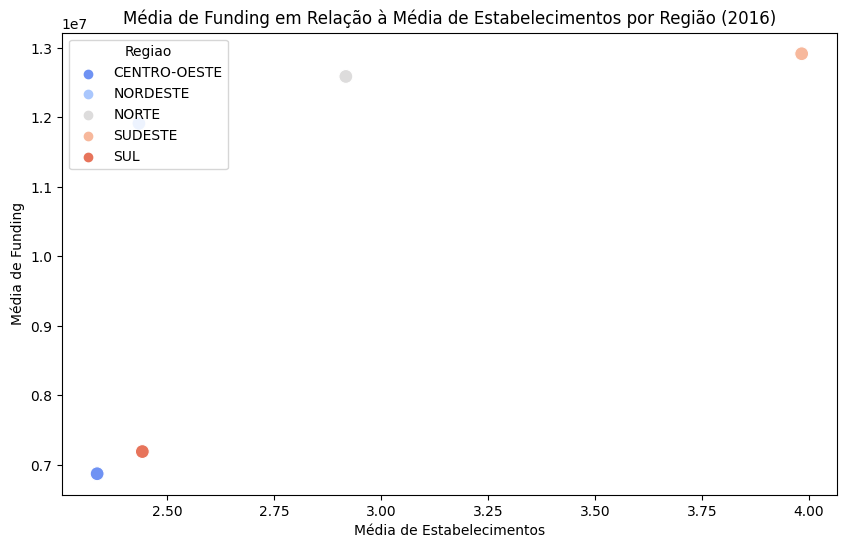

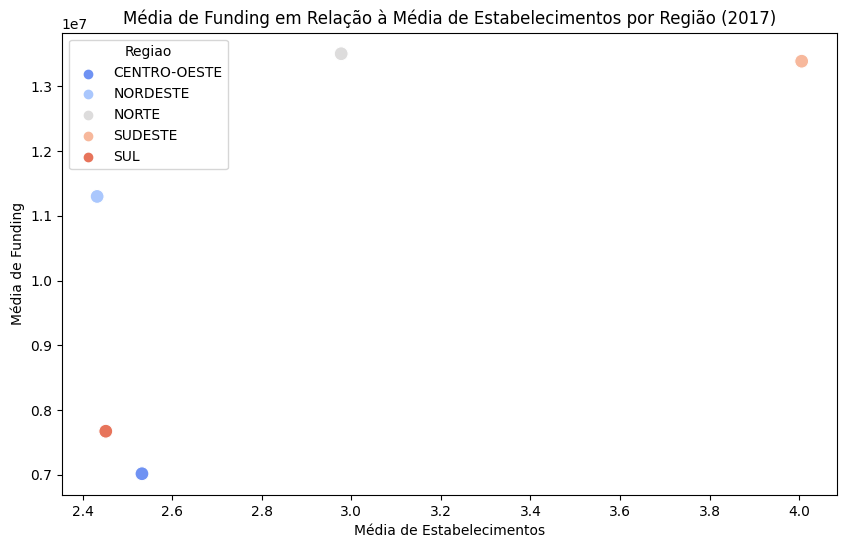

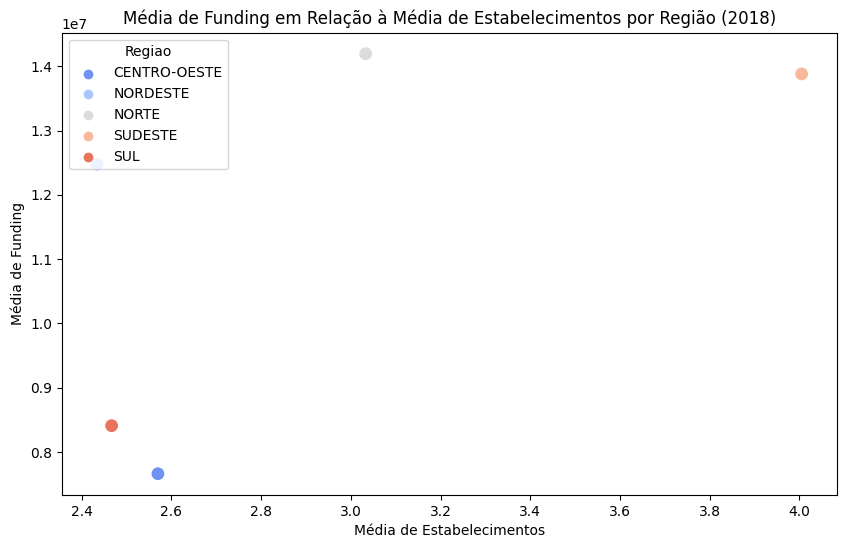

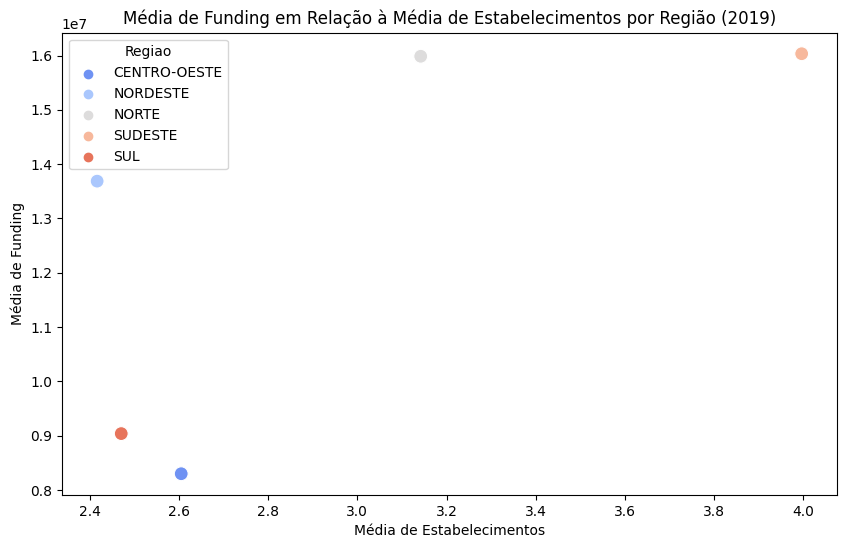

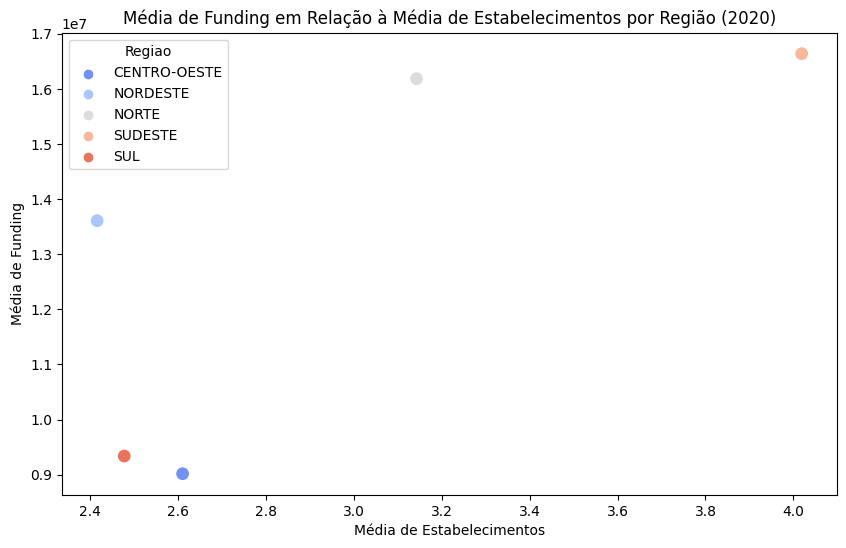

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenha uma lista única de anos
anos = df['Ano'].unique()

# Loop para criar gráficos de dispersão separados para cada ano
for ano in anos:
    # Filtre os dados para o ano específico
    dados_ano = df[df['Ano'] == ano]
    
    # Agrupe os dados por 'Regiao' e calcule as médias para 'adjusted_funding' e 'Estabelecimentos'
    dados_regiao_media = dados_ano.groupby('Regiao').agg({
        'adjusted_funding': 'mean',
        'Estabelecimentos': 'mean'
    }).reset_index()
    
    # Crie um gráfico de dispersão para a média de funding em relação à média de estabelecimentos
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Estabelecimentos', y='adjusted_funding', hue='Regiao', data=dados_regiao_media, palette='coolwarm', s=100)
    plt.title(f'Média de Funding em Relação à Média de Estabelecimentos por Região ({ano})')
    plt.xlabel('Média de Estabelecimentos')
    plt.ylabel('Média de Funding')
    plt.legend(title='Regiao', loc='upper left')
    
    plt.show()

In [1]:
path_file = '../ml_data/all_pib_ML_cleaned.csv'

In [2]:
df.to_csv(path_file, index=False)

NameError: name 'df' is not defined